In [11]:
#import matplotlib
##matplotlib.use('Qt5Agg')
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 22})
import qml
import numpy as np
import os

import sys
sys.path.insert(0, '/home/misa/APDFT/prototyping/atomic_energies/')
import explore_qml_data as qt

# calculates number of valence electrons based on nuclear charges
def get_num_val_elec(nuclear_charges):
    num_val = 0
    for charge in nuclear_charges:
        el = 0
        if charge <=2:
            num_val += charge
        elif charge >= 3 and charge <= 10:
            el = charge - 2
            num_val += el
        elif charge >= 11 and charge <= 18:
            el = charge - 10
            num_val += el
        else:
            assert('Cannot calculate number of valence electrons!')
    return(num_val)

In [2]:
# load qm9 data into qml compounds and count number of valence electrons per compound

# build path to data
d = '/home/misa/datasets/qm9/'
path_list = [os.path.join(d, f) for f in os.listdir(d)]
path_list.sort()

#calculate number of valence electrons for every compound
compounds = []
num_val = np.empty(len(path_list), dtype=int)
for idx, file in enumerate(path_list):
    mol = qml.Compound(xyz=file)
    num_val[idx] = get_num_val_elec(mol.nuclear_charges)
    
    if num_val[idx] == 38:
        compounds.append(file)
        

Text(0.5, 0, '# of valence electrons')

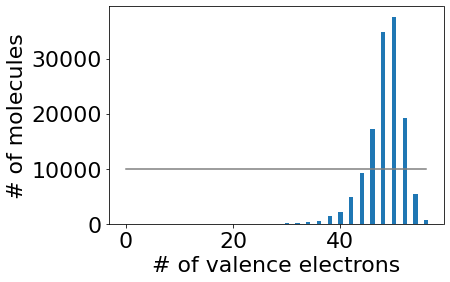

In [12]:
# plot distribution of molecules as a function of number of valence electrons 
occurences = np.bincount(num_val)
electron_number = np.linspace(0, 56, 57)


#plt.bar(electron_number, np.log10(occurences))
#plt.plot(np.linspace(0, 56,2), np.array([4,4]), color='tab:grey')
#plt.ylabel(r'$\log_{10}$ (# of molecules)')

plt.bar(electron_number, occurences)
plt.plot(np.linspace(0, 56,2), np.array([10000,10000]), color='tab:grey')
plt.ylabel(r'# of molecules')

plt.xlabel('# of valence electrons')
#plt.show()

In [ ]:
# slice of qm9 with 38 valence electrons
# show largest distance of between nucleus and geometric center for every molecule

path_list = []
with open('/home/misa/APDFT/prototyping/atomic_energies/results/val_el_38.txt') as file:
    path_list = [line.rstrip('\n') for line in file]
    
compounds = qt.load_compounds(path_list)
largest_comp = qt.find_largest_mol(compounds)

distances = qt.max_dist_distribution(compounds)
x=np.linspace(0, len(distances)-1, len(distances))
plt.rcParams.update({'font.size': 18})
plt.plot(x, distances, '-o', markersize=2)
plt.xlabel('Index of molecules in qm9 with 38 VE')
plt.ylabel(r'max$ ||\vec{R}-\vec{C}||_F $')

In [ ]:
idx=1250
from ase import Atoms
from ase.visualize import view
molecule = Atoms(compounds[idx].atomtypes, positions=compounds[idx].coordinates)
view(molecule, viewer='Avogadro')

In [ ]:
compounds[idx].name

In [ ]:
qt.max_dist_center_nuc(compounds[idx])
# np.median(distances)

In [ ]:
fig, ax = plt.subplots(1,1)
d_sorted = np.sort(distances)
ax.plot(d_sorted, x)